In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
                                                                                                                            
raw = pd.read_csv('data/kc_house_data.csv')

# I. Data preprocessing

In [7]:
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,'7129300520','20141013T000000',221900.0,3,1.00,1180,5650,'1',0,0,...,7,1180,0,1955,0,'98178',47.5112,-122.257,1340,5650
1,'6414100192','20141209T000000',538000.0,3,2.25,2570,7242,'2',0,0,...,7,2170,400,1951,1991,'98125',47.7210,-122.319,1690,7639
2,'5631500400','20150225T000000',180000.0,2,1.00,770,10000,'1',0,0,...,6,770,0,1933,0,'98028',47.7379,-122.233,2720,8062
3,'2487200875','20141209T000000',604000.0,4,3.00,1960,5000,'1',0,0,...,7,1050,910,1965,0,'98136',47.5208,-122.393,1360,5000
4,'1954400510','20150218T000000',510000.0,3,2.00,1680,8080,'1',0,0,...,8,1680,0,1987,0,'98074',47.6168,-122.045,1800,7503


#### Convertion de la variable floors et zipcode en numérique


In [9]:
raw[['floors', 'zipcode']] = pd.DataFrame(
    {
        'floors': [floor.replace("'","") for floor in raw.floors.values],
        'zipcode': [code.replace("'","") for code in raw.zipcode.values]
    }, dtype='float32')
raw[['floors', 'zipcode']].head()

AttributeError: 'numpy.float32' object has no attribute 'replace'

#### Conversion des unités au système européen

In [10]:
raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

#### Convertion les dates en date type  

In [11]:
raw['date'] = pd.to_datetime(raw['date'])
raw['month'] = pd.DatetimeIndex(raw.loc[:,'date']).month
raw['year'] = pd.DatetimeIndex(raw.loc[:,'date']).year
raw['day'] = pd.DatetimeIndex(raw.loc[:,'date']).day

In [12]:
raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,day
0,'7129300520',2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178.0,47.5112,-122.257,1340,5650,10,2014,13
1,'6414100192',2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125.0,47.7210,-122.319,1690,7639,12,2014,9
2,'5631500400',2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028.0,47.7379,-122.233,2720,8062,2,2015,25
3,'2487200875',2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136.0,47.5208,-122.393,1360,5000,12,2014,9
4,'1954400510',2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074.0,47.6168,-122.045,1800,7503,2,2015,18


In [13]:
raw.dtypes

id                       object
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float32
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                 float32
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
month                     int64
year                      int64
day                       int64
dtype: object

In [14]:
raw.columns.tolist()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'month',
 'year',
 'day']

In [15]:
# Reorder columns
raw = raw[['id',
 'price',
 'date',
 'year',
 'month',
 'day',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long'
]]

In [16]:
raw.head()

,id,price,date,year,month,day,bedrooms,bathrooms,sqft_living,sqft_lot,...,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,'7129300520',221900.0,2014-10-13,2014,10,13,3,1.00,1180,5650,...,0,3,7,1180,0,1955,0,98178.0,47.5112,-122.257
1,'6414100192',538000.0,2014-12-09,2014,12,9,3,2.25,2570,7242,...,0,3,7,2170,400,1951,1991,98125.0,47.7210,-122.319
2,'5631500400',180000.0,2015-02-25,2015,2,25,2,1.00,770,10000,...,0,3,6,770,0,1933,0,98028.0,47.7379,-122.233
3,'2487200875',604000.0,2014-12-09,2014,12,9,4,3.00,1960,5000,...,0,5,7,1050,910,1965,0,98136.0,47.5208,-122.393
4,'1954400510',510000.0,2015-02-18,2015,2,18,3,2.00,1680,8080,...,0,3,8,1680,0,1987,0,98074.0,47.6168,-122.045


In [17]:
data = {
    feature: raw[feature].values for feature in raw.columns[6:]
}

X = pd.DataFrame(
    data=data,
    index=raw['id'].values, 
)
y = pd.DataFrame(
    raw.price.values,
    columns=['price'],
    index=raw['id'].values, 
)

In [18]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
'7129300520',3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178.0,47.5112,-122.257
'6414100192',3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125.0,47.7210,-122.319
'5631500400',2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028.0,47.7379,-122.233
'2487200875',4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136.0,47.5208,-122.393
'1954400510',3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074.0,47.6168,-122.045


In [19]:
y.head()

,price
'7129300520',221900.0
'6414100192',538000.0
'5631500400',180000.0
'2487200875',604000.0
'1954400510',510000.0


### Normaliation des variables
La démarche est de transformer nos variables pour les compresser dans un espace entre 0 et 1, ceci diminu la dispersion et facilite la convergence de nos algorythmes

from sklearn.preprocessing import Normalizer

transformer = Normalizer(norm='l2', copy=True)

Xnorm = transformer.transform(X)
ynorm = transformer.transform([y])

# II. Selection des variables pertinentes

In [20]:
from sklearn.preprocessing import MinMaxScaler

classement = {}

# Créaction d'une fonction qui sauvegarde le rang 

def ranking(classement, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([classement]).T).T[0]
    ranks = map(lambda x: round(x,2), classement)
    return dict(zip(names, classement))

In [21]:
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)

rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, y)
classement["rlasso/Stability"] = ranking(rlasso.scores_, X.columns)

/home/djamel/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/home/djamel/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.feature_selection import RFE, f_regression

lr = LinearRegression(normalize=True) # on définit un modèle de RegLin
lr.fit(X,y)
rfe = RFE(lr, n_features_to_select=1, verbose =3 ) # on arrete la recherche à la dernière var restante
rfe.fit(X,y)
classement["RFE"] = ranking(list(map(float, rfe.ranking_)), X.columns, order=-1)

/home/djamel/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [23]:
lr = LinearRegression(normalize=True)
lr.fit(X,y)
classement["LinReg"] = ranking(np.abs(lr.coef_), X.columns)

ridge = Ridge(alpha = 7)
ridge.fit(X,y)
classement['Ridge'] = ranking(np.abs(ridge.coef_), X.columns)

lasso = Lasso(alpha=.05)
lasso.fit(X, y)
classement["Lasso"] = ranking(np.abs(lasso.coef_), X.columns)

ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,y)
classement["RF"] = ranking(rf.feature_importances_, X.columns)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 50building tree 2 of 50building tree 3 of 50

building tree 4 of 50

building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.5s


building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.1s finished


In [25]:
# Create empty dictionary to store the mean value calculated from all the scores
mean = {}
for col in X.columns:
    mean[col] = round(np.mean([
        classement[method][col] for method in classement.keys()
    ]), 2)
 
methods_names = sorted(classement.keys())
classement["Mean"] = mean
methods_names.append("Mean")

In [26]:
classement_df = pd.DataFrame(classement, columns=methods_names).sort_values(by=['Mean'], ascending=False)
classement_df

,RF,RFE,rlasso/Stability,Mean
sqft_lot,0.024343,16.0,1.000,5.67
yr_renovated,0.002208,15.0,1.000,5.33
zipcode,0.016001,14.0,1.000,5.01
floors,0.002259,13.0,0.995,4.67
yr_built,0.028975,12.0,1.000,4.34
bathrooms,0.008550,11.0,1.000,4.00
bedrooms,0.003648,10.0,1.000,3.67
condition,0.003380,9.0,1.000,3.33
view,0.012986,8.0,1.000,3.00
grade,0.332737,7.0,1.000,2.78


In [27]:
classement_df.index.tolist()

['sqft_lot',
 'yr_renovated',
 'zipcode',
 'floors',
 'yr_built',
 'bathrooms',
 'bedrooms',
 'condition',
 'view',
 'grade',
 'long',
 'lat',
 'waterfront',
 'sqft_living',
 'sqft_above',
 'sqft_basement']

/home/djamel/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/djamel/.local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


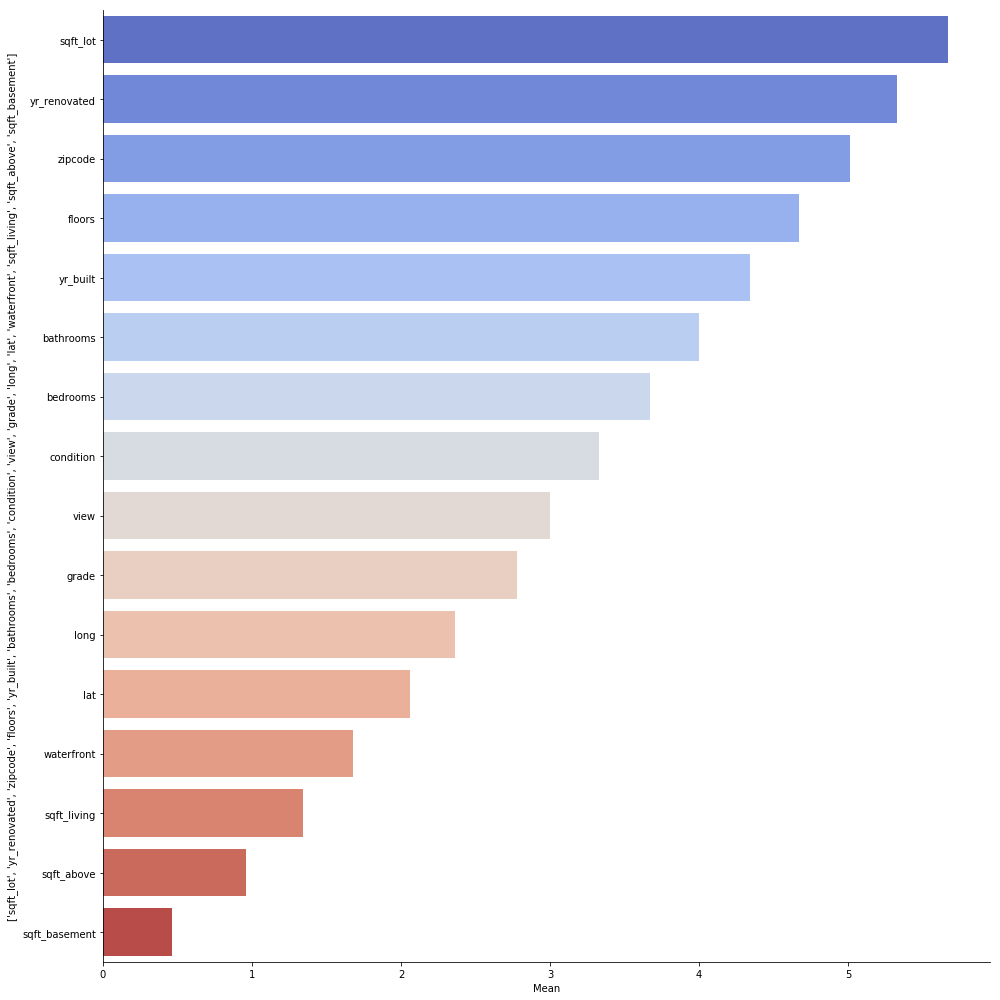

In [28]:
sns.factorplot(x="Mean", y=classement_df.index.tolist() , data = classement_df, kind="bar", 
               size=14, aspect=1, palette='coolwarm')

### L1-based feature selection

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Tree-based feature selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

### Univariate feature selection

In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

NameError: name 'X' is not defined

### Removing features with low variance

In [61]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.2)
X_new = selector.fit_transform(X)
selected_features_indices = selector.get_support(indices=True)
selected_features_labes = [X.columns[i] for i in selected_features_indices]
X_new = pd.DataFrame(
    data=X_new,
    columns=selected_features_labes,
)

for feature in X.columns.values:
    if feature not in X_new.columns.values:
        print('Not selected feature :'+feature)

Not selected feature :waterfront
Not selected feature :lat
Not selected feature :long


In [65]:
y = raw.price.values
x = X_new
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

lr = LinearRegression().fit(X_train, y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print(train_score, test_score)

0.6340607464129631 0.6241685888612626


# III. Modèles de prédiction
Nous allons appliquer dans cete partie plusieurs algorythmes de régression linéaire issus de la librairie ScikitLearn, le déroulement est le suivant : 
1. Régression linéaire multivariée
2. Régression Ridge
3. Régression Lasso 
4. Elastic Nets
5. Régression Least Angle LARS
6. Orthogonale Maching Persuit OMP
7. Régression Bayesienne 
8. Régressions polynomiales

## 1. Régression linéaire multivariée

In [16]:
from sklearn import linear_model
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split

In [2]:
def LinReg(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, random_state=0)

    lr = linear_model.LinearRegression().fit(X_train, y_train)

    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)

    return (train_score, test_score)
print('LinReg score: {} - Normalized: {}'.format(
    LinReg(X, y, 0.33), 
    LinReg(Xnorm, ynorm, 0.33)
))

NameError: name 'X' is not defined

### Regularisation parameter lambda

# Ridge regression model

\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

In [9]:
y = raw.price.values
x = X
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

for alpha in np.arange(0, 1, 0.1):
    reg = linear_model.Ridge(alpha=alpha)
    reg.fit(X_train, y_train)

    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)

    print('Alpha : {}\tTrain score : {}\tTest score : {}'
          .format(round(alpha,2), round(train_score,5), round(test_score,5)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.200593e-20
  overwrite_a=True).T


Alpha : 0.0	Train score : 0.70306	Test score : 0.67743
Alpha : 0.1	Train score : 0.70306	Test score : 0.67744
Alpha : 0.2	Train score : 0.70306	Test score : 0.67744
Alpha : 0.3	Train score : 0.70306	Test score : 0.67745
Alpha : 0.4	Train score : 0.70306	Test score : 0.67745
Alpha : 0.5	Train score : 0.70306	Test score : 0.67746
Alpha : 0.6	Train score : 0.70306	Test score : 0.67746
Alpha : 0.7	Train score : 0.70306	Test score : 0.67747
Alpha : 0.8	Train score : 0.70306	Test score : 0.67747
Alpha : 0.9	Train score : 0.70306	Test score : 0.67748


### Cross-Validation

In [82]:
y = raw.price.values
x = X
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

reg = linear_model.RidgeCV(alphas=[0.1, 1.0, 10.0], cv=3)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Alpha : {}\tTrain score : {}\tTest score : {}'
      .format(round(reg.alpha_,2), round(train_score,5), round(test_score,5)))

Alpha : 1.0	Train score : 0.70306	Test score : 0.67748


### Definition of parameter alpha

In [3]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xgblim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

NameError: name 'np' is not defined

# Lasso regression model
The Lasso is a linear model that estimates sparse coefficients. 
It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent.

In [78]:
y = raw.price.values
x = X
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

reg = linear_model.Lasso(alpha=0.5)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.70306	Test score : 0.67743


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Elastic Net
ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.33, random_state=0)

reg = linear_model.ElasticNet(random_state=0)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.61546	Test score : 0.60923


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Elastic net with cross validation

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=0)

reg = linear_model.ElasticNetCV(cv=5, random_state=0)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.39304	Test score : 0.39804


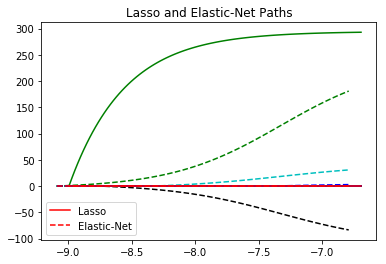

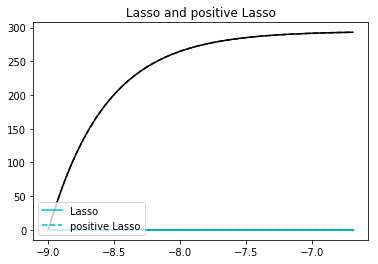

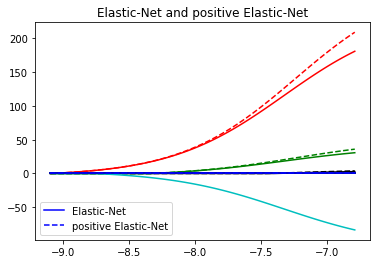

In [140]:
from itertools import cycle

from sklearn.linear_model import lasso_path, enet_path

X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps, fit_intercept=False)
alphas_positive_lasso, coefs_positive_lasso, _ = lasso_path(X, y, eps, positive=True, fit_intercept=False)
alphas_enet, coefs_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, fit_intercept=False)
alphas_positive_enet, coefs_positive_enet, _ = enet_path(X, y, eps=eps, l1_ratio=0.8, positive=True, fit_intercept=False)

# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso = -np.log10(alphas_lasso)
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_l, coef_e, c in zip(coefs_lasso, coefs_enet, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.title('Lasso and Elastic-Net Paths')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')

plt.figure(2)
neg_log_alphas_positive_lasso = -np.log10(alphas_positive_lasso)
for coef_l, coef_pl, c in zip(coefs_lasso, coefs_positive_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    l2 = plt.plot(neg_log_alphas_positive_lasso, coef_pl, linestyle='--', c=c)

plt.title('Lasso and positive Lasso')
plt.legend((l1[-1], l2[-1]), ('Lasso', 'positive Lasso'), loc='lower left')


plt.figure(3)
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
for (coef_e, coef_pe, c) in zip(coefs_enet, coefs_positive_enet, colors):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)

plt.title('Elastic-Net and positive Elastic-Net')
plt.legend((l1[-1], l2[-1]), ('Elastic-Net', 'positive Elastic-Net'),loc='lower left')
plt.show()

# Least Angle Regression or LARS


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=0)

reg = linear_model.Lars()
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.6952	Test score : 0.68916


### LARS Lasso

In [110]:
reg = linear_model.LassoLars(alpha=10)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.69492	Test score : 0.68929


.

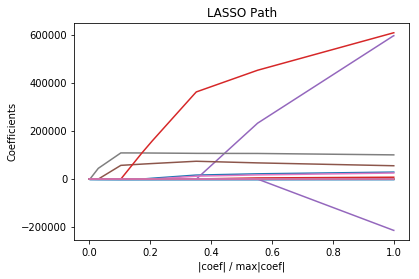

In [132]:
_, _, coefs = linear_model.lars_path(x.values, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

# Orthogonal Matching Pursuit (OMP)

In [154]:
n_nonzero_coefs = 17

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)
omp = linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp_cv = linear_model.OrthogonalMatchingPursuitCV(cv=5)
omp.fit(X_train, y_train)
omp_cv.fit(X_train, y_train)

reg = omp
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

reg=omp_cv
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}......cross validation'
      .format(round(train_score,5), round(test_score,5)))


Train score : 0.70306	Test score : 0.67743
Train score : 0.66142	Test score : 0.63716......cross validation


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/omp.py:673: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  return_n_iter=True)


# Bayesian Ridge Regression

In [155]:
reg = linear_model.BayesianRidge(compute_score=True)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.70306	Test score : 0.6774


# Automatic Relevance Determination Regression (ARD)

In [157]:
reg = linear_model.ARDRegression(compute_score=True)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

MemoryError: 

# Polynomial regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=0)

### Polynomial regression linearReg

In [20]:
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', linear_model.LinearRegression(fit_intercept=False))])

reg = model.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.83141	Test score : 0.82077


In [19]:
for degree in [1, 2, 3]:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
    reg = model.fit(X_train, y_train)

    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)

    print('Train score : {}\tTest score : {}.... degree = {}'
          .format(round(train_score,5), round(test_score,5), degree))

Train score : 0.7083	Test score : 0.68598.... degree = 1
Train score : 0.83135	Test score : 0.81982.... degree = 2
Train score : 0.87922	Test score : -0.81492.... degree = 3


### Polynomial regression Ridge

In [27]:
for degree in [1, 2, 3]:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.Ridge())
    reg = model.fit(X_train, y_train)

    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)

    print('Train score : {}\tTest score : {}.... degree = {}'
          .format(round(train_score,5), round(test_score,5), degree))

Train score : 0.70306	Test score : 0.67748.... degree = 1
Train score : 0.8238	Test score : 0.81685.... degree = 2
Train score : 0.8535	Test score : 0.67221.... degree = 3


In [34]:
for degree in [1, 2]:
    model = make_pipeline(PolynomialFeatures(degree), linear_model.Lasso(alpha=0.5))
    reg = model.fit(X_train, y_train)
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)

    print('Train score : {}\tTest score : {}.... degree = {}'
          .format(round(train_score,5), round(test_score,5), degree))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Train score : 0.70306	Test score : 0.67743.... degree = 1
Train score : 0.78094	Test score : 0.77615.... degree = 2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [33]:
reg = linear_model.PassiveAggressiveRegressor(max_iter=100, random_state=0, tol=1e-3)
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.38801	Test score : 0.4114


In [34]:
reg = linear_model.HuberRegressor()
reg.fit(X_train, y_train)
train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print('Train score : {}\tTest score : {}'
      .format(round(train_score,5), round(test_score,5)))

Train score : 0.47316	Test score : 0.46803


#### Création d'une variable de géolocalisation  

Il serait intéressant de créer une variable qui regroupe la latitude et la longitude avec la formule suivante :
geo = racine_carré(latitude^2 + longitude^2)

In [253]:
raw['geo'] = np.sqrt(raw['lat']**2+raw['long']**2)